# Данные

In [3]:
!wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv

--2019-06-09 15:14:46--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [following]
--2019-06-09 15:14:47--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc72dfebe0df9211a291d0cd3d0e.dl.dropboxusercontent.com/cd/0/inline/Aihac5g6aEsP623mi-AyIY4tEBLUFgrZJImll2LtbRtzdFP7e1CBzw-82srLmoUB1wLGPT2UzgHMkmK2eN9STG8JTEp6LuvWIaL6PPShFUz32g/file# [following]
--2019-06-09 15:14:47--  https://uc72dfebe0df9211a291d0cd3d0e.dl.dropboxusercontent.com/cd/0/inline/Aihac5g6aEsP623mi-AyIY4tEBLUFgrZJImll2LtbRtzdFP7e1CBzw-82srLmoUB1wLGPT2UzgHMkmK2eN9STG8JTEp6L

In [4]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


# Домашнее задание

В этом домашнем задании вы будете решать задачу тематической классификации. Даны тексты, опубликованные в нескольких пабликах VK.com, посвященных государственным и муниципальным службам. Формально задача заключается в том, чтобы по тексту ($d$) определить в каком паблике он опубликован, то есть, к какому классу $c$ он принадлежит. 

## Задание 1 [1 балл]. Описательные статистики
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [5]:
n = len(df)
print('Количество текстов: {}'.format(n))
print('Количество классов: {}'.format(len(df.source.unique())))

#<br> - один из самых частотных, это мусор, поэтому удаляем его.
for i in range(0, len(df)):
  df.text[i] = str(df.text[i]).replace('<br>', '')

Количество текстов: 11625
Количество классов: 4


In [6]:
!pip install pymorphy2

In [7]:
import pymorphy2 as pm
import numpy as np
from collections import Counter
import string
string.punctuation += '–' #Добавила, т.к. этого знака нет в исходной строке, а он один из самых частотных
morph = pm.MorphAnalyzer()

vocab_nolemm = Counter() #Словарь без лемматизации
vocab = Counter() #Словарь с лемматизацией
n_words = [] #Список для длинн текстов в словах
n_symbols = [] #Список для длинн текстов в символах

#Добавляем каждое слово в словарь, если это не знак пунктуации.
for line in df.text:
  n_line = 0
  n_symbols.append(len(line)) #Добавляем длину текста в символах
  for word in str(line).split():
    if word not in string.punctuation:
      n_line += 1
      p = morph.parse(word)[0].normal_form
      vocab[p] += 1
      vocab_nolemm[word.lower()] += 1
  n_words.append(n_line) #Добавляем длинну текста в словах


print('Количество слов без лемматизации: {}'.format(len(vocab_nolemm)))
print('Количество слов c лемматизацией: {}'.format(len(vocab)))
#print(vocab.most_common()[:10])
print('Средняя длинна текста в словах: {}'.format(np.mean(n_words)))
print('Средняя длинна текста в символах: {}'.format(np.mean(n_symbols)))

Количество слов без лемматизации: 126955
Количество слов c лемматизацией: 86386
Средняя длинна текста в словах: 82.76120430107527
Средняя длинна текста в символах: 661.6347526881721


In [8]:
#Пять самых частых существительных в текстах каждого паблика
sources = df.source.unique() #Создаем список наших пабликов

#Проходимся по всем источникам. Для каждого создаем словарь, добавляем в него все сущ. в нормальной форме. 
for element in sources:
  vocab_temp = Counter()
  df_temporary = df[df.source == element]
  for line in df_temporary.text:
    for word in str(line).split():
      if word not in string.punctuation and morph.parse(word)[0].tag.POS == 'NOUN' :
        p = morph.parse(word)[0].normal_form
        vocab_temp[p] += 1
  print('Пять самых частых сущ. в текстах паблика {}: {}'.format(element, vocab_temp.most_common()[:5]))
  

Пять самых частых сущ. в текстах паблика mil: [('военный', 1354), ('#минобороны', 973), ('россия', 951), ('год', 847), ('оборона', 777)]
Пять самых частых сущ. в текстах паблика mchsgov: [('#мчс', 1904), ('мчс', 1532), ('россия', 1375), ('#мчсроссия', 1217), ('спасатель', 497)]
Пять самых частых сущ. в текстах паблика russianpost: [('почта', 2595), ('россия', 1797), ('год', 1317), ('отделение', 1212), ('письмо', 879)]
Пять самых частых сущ. в текстах паблика mospolice: [('россия', 3714), ('мвд', 3148), ('москва', 3097), ('полиция', 2794), ('сотрудник', 2664)]


Стоит отметить, что в паблике mil наиболее частотным является 'Военный'. Возможно, сюда и попали некоторые употребления как прилагательные, но военный-сущ как раз соответствует интуитивному представлению о паблике mil(military), поэтому все хорошо. В остальных пабликах тоже слова соотвествуют тематике. 

Разделите коллекцию текстов на обучающую и тестовую части. 

In [64]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
len(train), len(test)

(9300, 2325)

 ## Задание 2 [2 балла]. Классификация по правилам
 
 * Разработайте несколько правил вида "Если встречается слово $w$, то текст относится к паблику $c$"
 * Посчитайте, какую точность, полноту, $f$-меру и $accuracy$ вы получаете при классификации по правилам
 * Получилось ли у вас придумать правило, которое никогда не ошибается?

Исходя из приведенных выше списков самых частых существительных, попробуем привести следующие правила:

1) Если в тексте есть слово '#мсч', то он относится к паблику mchgov.

2) Если в тексте есть слово 'военный', - то к паблику mil

3) Если есть 'полиция' и 'москва',  - то к mospolice

4) Если есть слово 'почта',  - то к russianpost.

При этом будем учитывать все формы наших искомых слов. Только в первом случае можно брать хэштэг, т.к. он, скорее всего, не изменяется.

In [10]:
#df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])


#Переделаем наши source в категориальные переменные где mil = 1; mschgov = 2; russianpost = 3; mospolice = 4.
id2source = {1:'mil', 2:'mchsgov', 3:'russianpost', 4:'mospolice'}
source2id = {source:i for i, source in id2source.items()}

#Создадим колонку 'predictions' где будут предсказания согласна нашим правилам. 
df['predictions'] = 0

for i in range(0, len(df.text)): # 1 правило
  if '#мчс' in str(df.text[i]).lower():
    df.predictions[i] = 'mchsgov'
    continue
  
  voin = morph.parse('военный')[0].lexeme #второе правило
  voin_forms = [x[0] for x in voin]
  for form in voin_forms:
    if form in str(df.text[i]).lower():
      df.predictions[i] = 'mil'
      break
  if df.predictions[i] != 0:
    continue    
  
  
  police = morph.parse('полиция')[0].lexeme #Третье правило: сначала ищем полицию
  police_forms = [x[0] for x in police]
  for form in police_forms:
    if form in str(df.text[i]).lower():
      mosk = morph.parse('москва')[0].lexeme #если она есть, ищем москву.
      mosk_forms = [x[0] for x in mosk]
      for form in mosk_forms[:-6]: #Убрали последние 6 форм, т.к. это абревиатуры типа 'м'
        if form in str(df.text[i]).lower():
          df.predictions[i] = 'mospolice'
          break
    if df.predictions[i] != 0:
      break
  if df.predictions[i] != 0:
    continue  
  
  post = morph.parse('почта')[0].lexeme #Четвертое
  post_forms = [x[0] for x in post]
  for form in post_forms:
    if form in str(df.text[i]).lower():
      df.predictions[i] = 'russianpost'
      break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
df.head()

,text,source,predictions
0,Начальник Главного оперативного управления Ген...,mil,mil
1,Артиллерийские подразделения общевойскового об...,mil,0
2,Подразделения морской пехоты Каспийской флотил...,mil,0
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,mil
4,На большом учебно-методическом командирском сб...,mil,mil


Всего у нас 11625 текстов. Последовательно применив каждое правило, получаем следующие результаты:

1) После применения первого правила неразмеченными остались 9649 текстов.

2) После применения второго - 8732.

3) После третьего  - 6877.

4) После четвертого - 4555. 

Таким образом, мы обработали примерно треть текстов. Посмотрим на обработанные тексты, посчитаем метрики на них.

In [0]:
LABELS = ['mchsgov', 'mil', 'mospolice', 'russianpost']

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [14]:
df_done = df[df.predictions != 0 ]
df_done.head()
print(len(df) - len(df_done), len(df_done)) #Кол-во непредсказанных текстов и кол-во предсказанных
metrics = precision_recall_fscore_support(list(df_done.source), list(df_done.predictions), average='macro', labels=LABELS)
acc = accuracy_score(list(df_done.source), list(df_done.predictions))

print('Precision: {}'.format(metrics[0]))
print('Recall: {}'.format(metrics[1]))
print('f1-score: {}'.format(metrics[2]))
print('Accuracy: {}'.format(acc))

4555 7070
Precision: 0.950582603129613
Recall: 0.9562922216356675
f1-score: 0.953242126700108
Accuracy: 0.958981612446959


Таким образом, для тех текстов, которые мы смогли классифицировать, метрики высокие. Посмотрим теперь на все тексты. 

In [15]:
metrics = precision_recall_fscore_support(list(df.source), list(df.predictions), average='macro', labels=LABELS)
acc = accuracy_score(list(df.source), list(df.predictions))

print('Precision: {}'.format(metrics[0]))
print('Recall: {}'.format(metrics[1]))
print('f1-score: {}'.format(metrics[2]))
print('Accuracy: {}'.format(acc))

Precision: 0.950582603129613
Recall: 0.5912811283749377
f1-score: 0.7095386914883555
Accuracy: 0.5832258064516129


Очевидно, что показатели ниже.  Для того, чтобы понять, получилось ли такое правило, которое не ошибается. Посмотрим Precision для всех наших классов. (Т.к. на присваивание одному классу есть только одно правило, что если Precision = 1, то это правило абсолютно верное.)


In [16]:
precisions = precision_recall_fscore_support(list(df_done.source), list(df_done.predictions), labels=LABELS)[0]
precisions

array([0.98279352, 0.89094875, 0.97897574, 0.9496124 ])

Мы видим, что максимальный Precision у первого класса, а это у нас - mchgov. На этот класс указывает только одно правило.  А значит - оно не дает максимальных результатов, но оно самое лучшее из рассмотренных четырех правил. Хуже всего сработало правило про 'военный'.

In [0]:
#Удалим колонку с нашими предсказаниями, она больше не нужна
del df['predictions']

In [18]:
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


## Задание 3 [3 балла]. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [20]:
#Векторизация
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.text)
X_train_counts.shape

(9300, 74162)

In [21]:
#Tf-трансформация
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(9300, 74162)

In [22]:
#Tf-idf Трансформация
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(9300, 74162)

In [0]:
#Используем Native Bayes
clf = MultinomialNB().fit(X_train_tfidf, train.source)

In [0]:
#Строим pipeline
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
 ])

In [25]:
text_clf.fit(train.text, train.source)  #Обучаем его

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predicted = text_clf.predict(test.text)

In [27]:
print(metrics.classification_report(test.source, predicted, target_names= LABELS))

              precision    recall  f1-score   support

     mchsgov       0.98      0.91      0.95       629
         mil       0.98      0.96      0.97       604
   mospolice       0.94      1.00      0.96       563
 russianpost       0.91      0.95      0.93       529

    accuracy                           0.95      2325
   macro avg       0.95      0.96      0.95      2325
weighted avg       0.96      0.95      0.95      2325



Из отчета мы видим, что лучше всего удалось классифицировать mil (хоть полнота и уступает mospolice, но f-мера самая высокая из всех.)


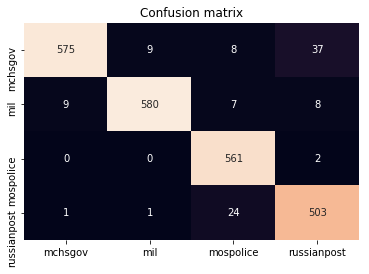

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


cnf_matrix_baseline = metrics.confusion_matrix(test.source, predicted, labels=LABELS)
sns.heatmap(cnf_matrix_baseline, annot=True, fmt="d", cbar=False,xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion matrix")
plt.show()

Из матрицы ошибок мы можем видеть, что много лишних текстов было приписано к классам mospolice и russianpost.  Однако больше всего текстов было отнято у класса  mchsgov и russianpost. 

## Задание 4 [2 балла]. Снижение размерности
Добавьте в ваш ```sklearn.pipeline```  методы снижения размерности:  PCA / LSI / LSA / LDA / другое. Какие методы классификации разумно использовать после снижения размерности? Как изменились результаты классификации после добавления нового шага?

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [0]:
text_clf_lr = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
    ('svd', TruncatedSVD(n_components=4)),
     ('lg', logreg),
 ])

In [32]:
text_clf_lr.fit(train.text, train.source)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=4, n_iter=5,
                              random_state=None, tol=0.0)),
                ('lg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [0]:
predicted_lr = text_clf_lr.predict(test.text)

In [34]:
print(metrics.classification_report(test.source, predicted_lr, target_names= LABELS))

              precision    recall  f1-score   support

     mchsgov       0.95      0.78      0.86       629
         mil       0.55      0.85      0.67       604
   mospolice       0.94      0.95      0.95       563
 russianpost       0.62      0.36      0.46       529

    accuracy                           0.74      2325
   macro avg       0.77      0.74      0.73      2325
weighted avg       0.77      0.74      0.74      2325



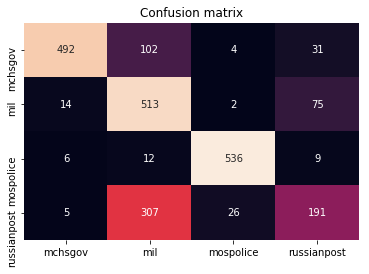

In [35]:
cnf_matrix_lr = metrics.confusion_matrix(test.source, predicted_lr, labels=LABELS)
sns.heatmap(cnf_matrix_lr, annot=True, fmt="d", cbar=False, xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion matrix")
plt.show()

Можно заметить явные ухуждения по всем показателям, но связано это с тем, что использована была логистическая регрессия. В дальнейшем лучше отказаться от этой идеи. Хуже всего классификация прошла для russianpost (f-score и recall меньше 0.5)

## Задание 5 [1 балл]. Лемматизация
Посмотрите, как влияет лемматизация на качество классификации. Как изменится качество классификации, если вы используете ```CountVectorizer``` на словах или $n$-граммах на лемматизированных текстах?

In [65]:
train.head()

,text,source
8502,Почтовая химия!Клей для марок готовится из сме...,russianpost
9169,"На Петровке, 38 председателя Совета ветеранов ...",mospolice
3370,#МЧС #МЧСРОССИИ При подготовке к Чемпионату ми...,mchsgov
4950,"#ПамяткаМЧС #МЧС #МЧСРОССИИГаз, по-прежнему, и...",mchsgov
3245,#МЧС #МЧСРОССИИСотрудники МЧС России обследуют...,mchsgov


In [66]:
train['lemmas'] = 'empty'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
#Здесь мы обнулили наши индексы, чтобы все было хорошо и как надо, а то изначально все было плохо, сохранили старые на всякий случай в колонке index
train = train.reset_index()#drop=True)

In [0]:
test = test.reset_index()

In [69]:
#Создаем список с лемматизацией, его будем подавать в CountVectorizer()
for i, element in enumerate(train.text):
  #print(train.text[0])
  #print(element)
  new_text = ''
  for word in str(element).split():
    p = morph.parse(word)[0].normal_form
    new_text = new_text + ' ' + p
  #print(new_text)
  train['lemmas'][i] = new_text
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
train.head()

,index,text,source,lemmas
0,8502,Почтовая химия!Клей для марок готовится из сме...,russianpost,почтовый химия!клеить для марка готовиться из...
1,9169,"На Петровке, 38 председателя Совета ветеранов ...",mospolice,"на петровке, 38 председатель совет ветеран гу..."
2,3370,#МЧС #МЧСРОССИИ При подготовке к Чемпионату ми...,mchsgov,#мчс #мчсроссия при подготовка к чемпионат ми...
3,4950,"#ПамяткаМЧС #МЧС #МЧСРОССИИГаз, по-прежнему, и...",mchsgov,"#памяткамчс #мчс #мчсроссиигаз, по-прежнему, ..."
4,3245,#МЧС #МЧСРОССИИСотрудники МЧС России обследуют...,mchsgov,#мчс #мчсроссиисотрудник мчс россия обследова...


In [72]:
len(train.text), len(train.lemmas)

(9300, 9300)

In [73]:
#Подаем на вход лемматизированные данные
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.lemmas)
X_train_counts.shape

(9300, 48479)

In [74]:
#Tf-трансформация
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(9300, 48479)

In [75]:
#Tf-idf Трансформация
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(9300, 48479)

Можно заметить, что уменьшается размерность X по сравнению с предыдущими методами

In [0]:
clf = MultinomialNB().fit(X_train_tfidf, train.source)

In [0]:
#Строим pipeline
text_clf_lemm = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
 ])

In [78]:
text_clf_lemm.fit(train.lemmas, train.source)  #Обучаем его

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predicted_lemm = text_clf_lemm.predict(test.text)

In [80]:
print(metrics.classification_report(test.source, predicted_lemm, target_names=LABELS))

              precision    recall  f1-score   support

     mchsgov       0.99      0.93      0.96       614
         mil       0.99      0.98      0.98       583
   mospolice       0.95      0.99      0.97       591
 russianpost       0.92      0.95      0.94       537

    accuracy                           0.96      2325
   macro avg       0.96      0.96      0.96      2325
weighted avg       0.96      0.96      0.96      2325



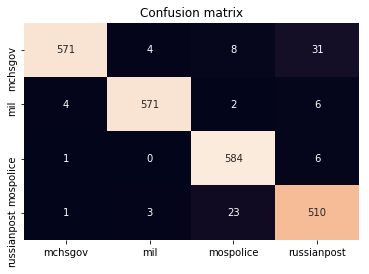

In [81]:
cnf_matrix_lemm = metrics.confusion_matrix(test.source, predicted_lemm, labels=LABELS)
sns.heatmap(cnf_matrix_lemm, annot=True, fmt="d", cbar=False, xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion matrix")
plt.show()

В целом, различий особых нет. Разница по сравнению с baseline в пределах 0.02 для f-score. 

## Задание 6 [3 балла]. Continious bag of words
Для baseline решения мы использовали обычное представление текста в виде мешка слов. Попробуйте использовать другие модели представления текста – например, в виде непрерывного мешка слов, то есть, в виде набора эмбеддингов. Для того, чтобы получить вектор текста попробуйте:
* усреднить все эмбеддинги слов, входящих в этот текст
* усреднить все эмбеддинги слов, входящих в этот текст с $tf-idf$ весами
* использовать любую модель эмбеддинга документа.

Используйте любую модель эмбеддингов по вашему вкусу. 


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [82]:
#Источник, на котором основывалась http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
import gensim
model = gensim.models.Word2Vec(train.text, size=100)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(list(word2vec.values()))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [0]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(list(word2vec.values()))

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # Если слово абсолютно не знакомое, то ставим дефолт idf (max)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [86]:
etree_w2v.fit(train.text, train.source)

Pipeline(memory=None,
         steps=[('word2vec vectorizer',
                 <__main__.MeanEmbeddingVectorizer object at 0x7fd0b81cf4e0>),
                ('extra trees',
                 ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                      criterion='gini', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=200, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [0]:
predicted_cbow1 = etree_w2v.predict(test.text)

In [88]:
print(metrics.classification_report(test.source, predicted_cbow1, target_names= LABELS))

              precision    recall  f1-score   support

     mchsgov       0.96      0.84      0.90       614
         mil       0.86      0.93      0.89       583
   mospolice       0.92      0.88      0.90       591
 russianpost       0.80      0.88      0.84       537

    accuracy                           0.88      2325
   macro avg       0.88      0.88      0.88      2325
weighted avg       0.89      0.88      0.88      2325



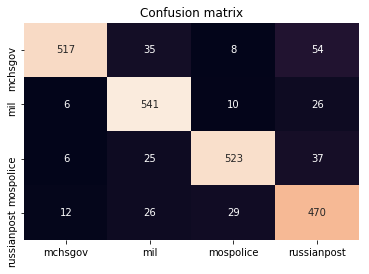

In [89]:
cnf_matrix_cwbo1 = metrics.confusion_matrix(test.source, predicted_cbow1)
sns.heatmap(cnf_matrix_cwbo1, annot=True, fmt="d", cbar=False, xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion matrix")
plt.show()

Это была матрица просто по векторам (1 пункт из задания). Худшие результаты наблюдаются для russianpost. Посмотрим, что будет, если использовать с tf-idf. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [91]:
etree_w2v_tfidf.fit(train.text, train.source)

Pipeline(memory=None,
         steps=[('word2vec vectorizer',
                 <__main__.TfidfEmbeddingVectorizer object at 0x7fd0ba68e278>),
                ('extra trees',
                 ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                      criterion='gini', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=200, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [0]:
predicted_cbow2 = etree_w2v_tfidf.predict(test.text)

In [93]:
print(metrics.classification_report(test.source, predicted_cbow2, target_names= LABELS))

              precision    recall  f1-score   support

     mchsgov       0.95      0.86      0.90       614
         mil       0.86      0.93      0.89       583
   mospolice       0.93      0.89      0.91       591
 russianpost       0.79      0.86      0.83       537

    accuracy                           0.88      2325
   macro avg       0.88      0.88      0.88      2325
weighted avg       0.89      0.88      0.88      2325



Показатели улучшились!!! (f1-score только для mospolice хуже на 0.01)

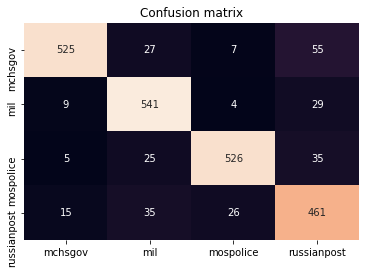

In [94]:
cnf_matrix_cwbo2 = metrics.confusion_matrix(test.source, predicted_cbow2)
sns.heatmap(cnf_matrix_cwbo2, annot=True, fmt="d", cbar=False, xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion matrix")
plt.show()

Из матрицы можно заметить, что ситуация с russianpost стала чуть хуже.

## Задание 7 [2 балла]. fastText

Используйте ```fastText``` в режиме классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [95]:
!pip install fasttext

In [0]:
import fasttext

In [97]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip
!unzip 0.2.0.zip
%cd fastText-0.2.0
!make

--2019-06-09 15:56:36--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/0.2.0 [following]
--2019-06-09 15:56:36--  https://codeload.github.com/facebookresearch/fastText/zip/0.2.0
Resolving codeload.github.com (codeload.github.com)... 192.30.253.121
Connecting to codeload.github.com (codeload.github.com)|192.30.253.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘0.2.0.zip.1’

0.2.0.zip.1             [  <=>               ]   4.10M  12.0MB/s    in 0.3s    

2019-06-09 15:56:37 (12.0 MB/s) - ‘0.2.0.zip.1’ saved [4304799]

Archive:  0.2.0.zip
7842495a4d64c7a3bb4339d45d6e64321d002ed8
replace fastText-0.2.0/.circleci/cmake_test.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename:

In [0]:
#Записываем файл в текстовый в нужном для fastText формате __label__класс текст
with open('train.txt', 'w', encoding = 'utf-8') as file:
  for i in range(0, len(train.source)):
    try:
      text = '__label__' + str(list(train.source)[i]) + ' '     
      text_news = list(train.text)[i]
      full = text + text_news + '\n'
      file.write(full)
    except:
      print(i)

In [99]:
#Обучаем fasttext на 1000 эпохах
! ./fasttext supervised -input train.txt -lr 0.1 -epoch 1000 -output model

Read 0M words
Number of words:  117977
Number of labels: 4
Progress: 100.0% words/sec/thread:  347998 lr:  0.000000 loss:  0.033176 ETA:   0h 0m


In [0]:
#Приведем к данному формату и тестовые данные. 
with open('test.txt', 'w', encoding = 'utf-8') as file:
  for i in range(0, len(test.source)):
    try:
      text = '__label__' + str(list(test.source)[i]) + ' '     
      text_news = list(test.text)[i]
      full = text + text_news + '\n'
      file.write(full)
    except:
      print(i)

In [101]:
! ./fasttext test model.bin test.txt 1

N	2325
P@1	0.962
R@1	0.962


In [0]:
#Записываем предсказанное в отдельный файл
! ./fasttext predict model.bin test.txt 1 > predicted.txt

In [0]:
#Составляем список из предсказаний, убираем от туда __label__
with open('predicted.txt', 'r', encoding='utf-8') as file:
  predicted_ft = []
  for line in file.readlines():
    if line.startswith('__'):
      predicted_ft.append(line[9:-1])

In [104]:
predicted_ft[:10]


['mospolice',
 'mil',
 'mchsgov',
 'mchsgov',
 'mospolice',
 'mchsgov',
 'mil',
 'mospolice',
 'mospolice',
 'mchsgov']

In [105]:
print(metrics.classification_report(test.source, predicted_ft, target_names= LABELS))

              precision    recall  f1-score   support

     mchsgov       0.97      0.93      0.95       614
         mil       0.97      0.99      0.98       583
   mospolice       0.97      0.98      0.97       591
 russianpost       0.94      0.95      0.94       537

    accuracy                           0.96      2325
   macro avg       0.96      0.96      0.96      2325
weighted avg       0.96      0.96      0.96      2325



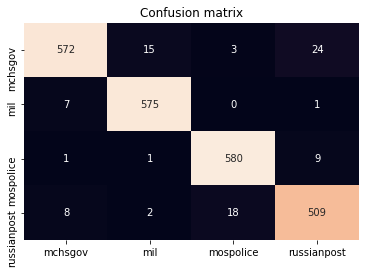

In [106]:
cnf_matrix_ft = metrics.confusion_matrix(test.source, predicted_ft)
sns.heatmap(cnf_matrix_ft, annot=True, fmt="d", cbar=False, xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion matrix")
plt.show()

Мы видим, что качество предсказаний одно из наилучших.  Есть небольшие выбросы (в russianpost особенно), но в целом, все красиво и прекрасно.  Для всех классов f-score превышает 0.95!

## Задание 8 [4 балла]. CNN

Реализуйте модель Kim et al (2014) для решения задачи классификации с помощью CNN. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix).
Ссылка: Kim Y. Convolutional Neural Networks for Sentence Classification. 2014

In [107]:
from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [0]:
#Модель взята из семинара и немного доработана под дз
TEXT_LENGTH = 9300
VOCABULARY_SIZE = 9300
EMBEDDING_DIM = 100
DIMS = 250
MAX_FEATURES = 9300
batch_size = 128

nb_filter = 250
filter_length = 1
hidden_dims = 250
nb_epoch = 100

In [182]:
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train.text)
tokenizer

In [0]:
sequences = tokenizer.texts_to_sequences(train.text)
X_train = tokenizer.sequences_to_matrix(sequences, mode='count')
sequences = tokenizer.texts_to_sequences(test.text)
X_test = tokenizer.sequences_to_matrix(sequences, mode='count')

In [0]:
le = LabelEncoder()
le.fit(train.source.unique())
y_train = np_utils.to_categorical(le.transform(train.source), 4)
y_test = np_utils.to_categorical(le.transform(test.source), 4)
y_true = le.transform(test.source)

In [0]:
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE,
                            EMBEDDING_DIM,
                            input_length=TEXT_LENGTH,
                            trainable=True))
model.add(Conv1D(128, 16, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [186]:
model.fit(X_train, y_train, batch_size=128, epochs=3)

Epoch 1/3
9300/9300 [==============================] - 50s 5ms/step - loss: 1.1458 - acc: 0.6295
Epoch 2/3
9300/9300 [==============================] - 49s 5ms/step - loss: 0.1681 - acc: 0.9589
Epoch 3/3
9300/9300 [==============================] - 49s 5ms/step - loss: 0.0665 - acc: 0.9835


In [0]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

In [0]:
#Делаем обратную трансформацию
y_true = le.inverse_transform(y_true)

              precision    recall  f1-score   support

     mchsgov       0.97      0.94      0.96       614
         mil       0.97      0.99      0.98       583
   mospolice       0.96      0.99      0.98       591
 russianpost       0.96      0.93      0.95       537

    accuracy                           0.97      2325
   macro avg       0.96      0.96      0.96      2325
weighted avg       0.97      0.97      0.96      2325



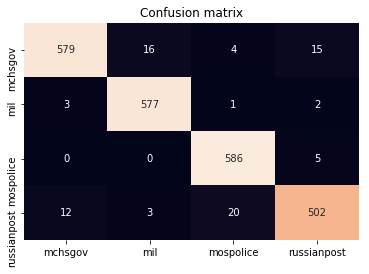

In [189]:
print(metrics.classification_report(y_true, y_pred))
sns.heatmap(data=metrics.confusion_matrix(y_true, y_pred, labels = LABELS), annot=True, fmt="d", cbar=False, xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion matrix")
plt.show()

Как и в случае с FastText, f-score везде выше 0.95. Матрица ошибок показывает, что больше всего путаницы с russianpost(опять) и mchsgov.

## Задание 9 [4 + 2 балла]. RNN

(4 балла)Используйте ```RNN``` для решения задачи текстовой классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix).

За дополнительные 2 балла добавьте в модель символьные признаки - CharCNN или CharRNN

In [0]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index

In [191]:
#Делаем все одинаковой длинны
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
X.shape

(11625, 250)

In [192]:
Y = pd.get_dummies(df['source']).values
Y.shape

(11625, 4)

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(10462, 250) (10462, 4)
(1163, 250) (1163, 4)


In [0]:
from keras.layers import SpatialDropout1D, LSTM
from keras.callbacks import EarlyStopping

In [195]:
#Первый слой - эмбединг, второй - LSTM. На выходе - 4 значение( на каждый класс)
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 9415 samples, validate on 1047 samples
Epoch 1/5
9415/9415 [==============================] - 90s 10ms/step - loss: 0.6050 - acc: 0.7928 - val_loss: 0.1852 - val_acc: 0.9503
Epoch 2/5
9415/9415 [==============================] - 89s 9ms/step - loss: 0.1402 - acc: 0.9668 - val_loss: 0.1191 - val_acc: 0.9713
Epoch 3/5
9415/9415 [==============================] - 89s 9ms/step - loss: 0.0738 - acc: 0.9804 - val_loss: 0.1159 - val_acc: 0.9675
Epoch 4/5
9415/9415 [==============================] - 89s 9ms/step - loss: 0.0543 - acc: 0.9857 - val_loss: 0.1259 - val_acc: 0.9608
Epoch 5/5
9415/9415 [==============================] - 89s 9ms/step - loss: 0.0415 - acc: 0.9890 - val_loss: 0.1240 - val_acc: 0.9694


In [196]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1163/1163 [==============================] - 8s 7ms/step
Test set
  Loss: 0.115
  Accuracy: 0.966


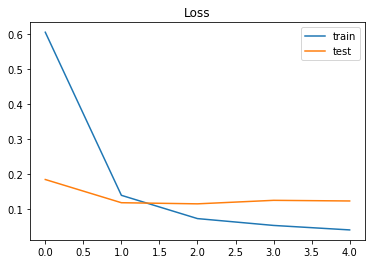

In [197]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

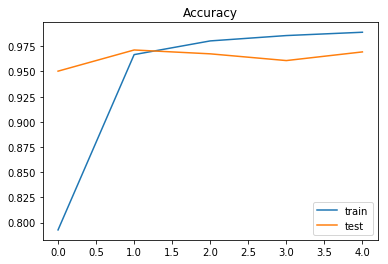

In [198]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

Как мы видим, результаты на валидации лучше чем в остальных методах. Acc > 0.95

## Задание 10 [8 баллов]. ULMFit

Используйте ```ULMFit``` для решения задачи классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

**ИТОГО**: Лучше всего себя показала модель fasttext. Она и простая в применении, и дает высокие результаты. По сравнению  с CNN ее плюс еще и в том, что времени тратится меньше. У обеих моделей f-score был более 0.95. 

Для данного конкретного задания лемматизация не принесла каких-либо существенных результатов, поэтому была использована только в одном пункте. 



## Конец
Выполните какие-то из предыдущих заданий. Для всех заданий, кроме задания 1 требуется вычислить метрику accuracy метода.

Подведите итоги и проведите сравнение всех использованных методов. Какой из них показался вам лучше и почему?

**NB!** Задание обязательное вне зависимости от того, сколько из предыдущих пунктов вы выполнили, и дополнительных баллов не дает.


Для получения полной оценки за NLP-часть достаточно набрать **20 баллов**.

# Правила сдачи 

1. Домашняя работа должна быть выполнена в ipynb-тетрадке.
2. Сделанную тетрадку нужно отправить ассистенту (ссылка на контакты будет в вики).
3. Задание выполняется индивидуально.
4. Все вычисления должны быть снабжены пояснениями!
5. Дедлайн – 10 июня в 10.00.
